In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

data = pd.read_csv("data/heart.csv")
data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

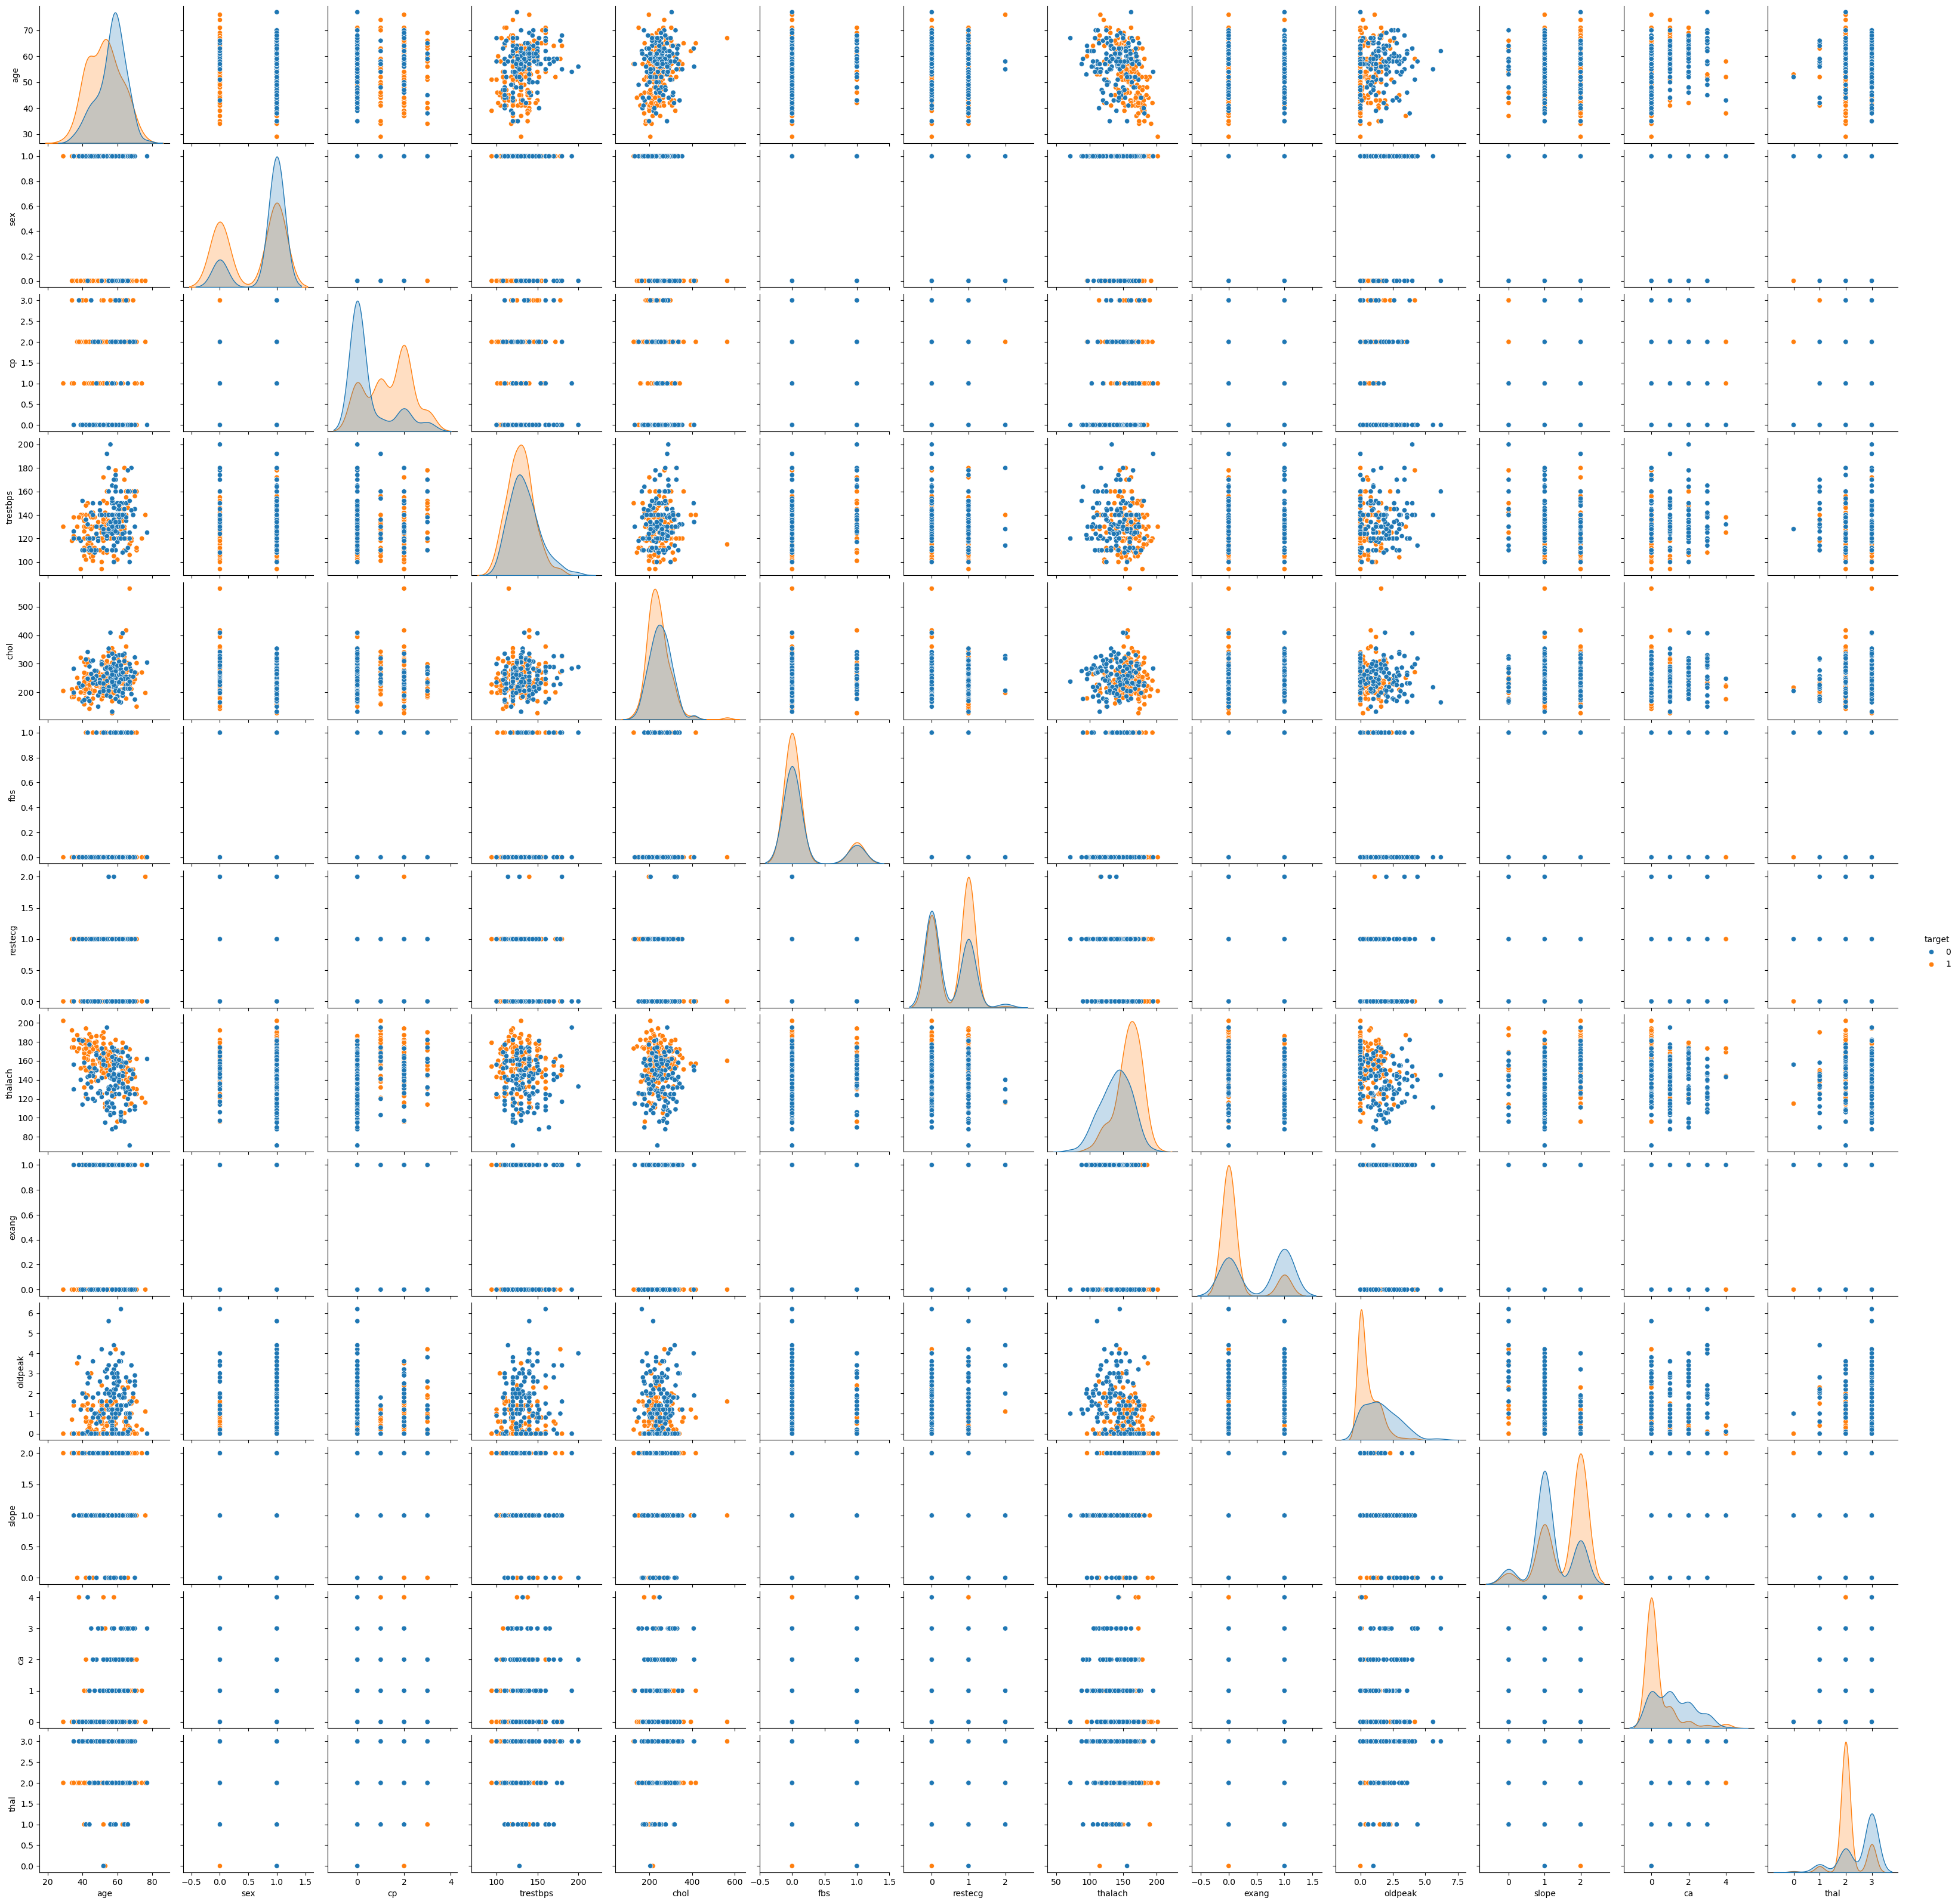

In [154]:
### preprocess and EDA

# look for predictive features
sns.pairplot(data, hue='target')

# scale

In [155]:
# select predictors based on observations from pairplots
X = data[['age', 'sex', 'cp', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

log_clf = LogisticRegression(max_iter=500)
log_clf.fit(X_train, y_train)

y_pred_log = log_clf.predict(X_test)

log_clf_acc = accuracy_score(y_test, y_pred_log)
log_clf_pre = precision_score(y_test, y_pred_log)
log_clf_rec = recall_score(y_test, y_pred_log)
log_clf_f1 = f1_score(y_test, y_pred_log)


In [156]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

y_pred_nb = nb_clf.predict(X_test)

nb_clf_acc = accuracy_score(y_test, y_pred_nb)
nb_clf_pre = precision_score(y_test, y_pred_nb)
nb_clf_rec = recall_score(y_test, y_pred_nb)
nb_clf_f1 = f1_score(y_test, y_pred_nb)

In [157]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

rf_clf_acc = accuracy_score(y_test, y_pred_rf)
rf_clf_pre = precision_score(y_test, y_pred_rf)
rf_clf_rec = recall_score(y_test, y_pred_rf)
rf_clf_f1 = f1_score(y_test, y_pred_rf)

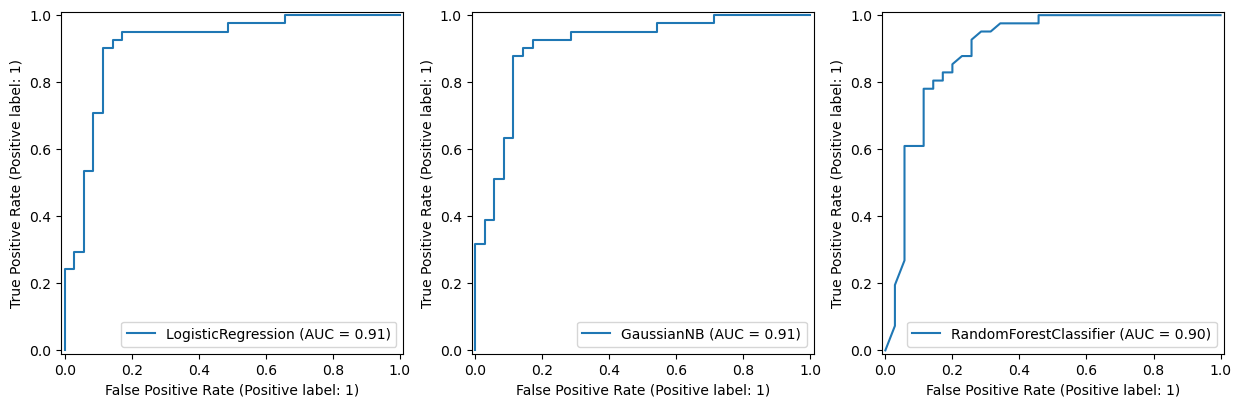

In [158]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

RocCurveDisplay.from_estimator(log_clf, X_test, y_test, ax=axes[0])
RocCurveDisplay.from_estimator(nb_clf, X_test, y_test, ax=axes[1])
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, ax=axes[2])

plt.show()

In [159]:
print("Logistic Regression Classifier")
print(f"Accuracy score: {log_clf_acc:.4}")
print(f"Precision score: {log_clf_pre:.4}")
print(f"Recall score: {log_clf_rec:.4}")
print(f"F1 score: {log_clf_f1:.4}")

print("\nGaussian NB Classifier:")
print(f"Accuracy score: {nb_clf_acc:.4}")
print(f"Precision score: {nb_clf_pre:.4}")
print(f"Recall score: {nb_clf_rec:.4}")
print(f"F1 score: {nb_clf_f1:.4}")

print("\nRandom Forest Classifier:")
print(f"Accuracy score: {rf_clf_acc:.4}")
print(f"Precision score: {rf_clf_pre:.4}")
print(f"Recall score: {rf_clf_rec:.4}")
print(f"F1 score: {rf_clf_f1:.4}")

Logistic Regression Classifier
Accuracy score: 0.8947
Precision score: 0.8667
Recall score: 0.9512
F1 score: 0.907

Gaussian NB Classifier:
Accuracy score: 0.8684
Precision score: 0.8444
Recall score: 0.9268
F1 score: 0.8837

Random Forest Classifier:
Accuracy score: 0.8289
Precision score: 0.8182
Recall score: 0.878
F1 score: 0.8471


Text(0.5, 1.0, 'RandomForestClassifier')

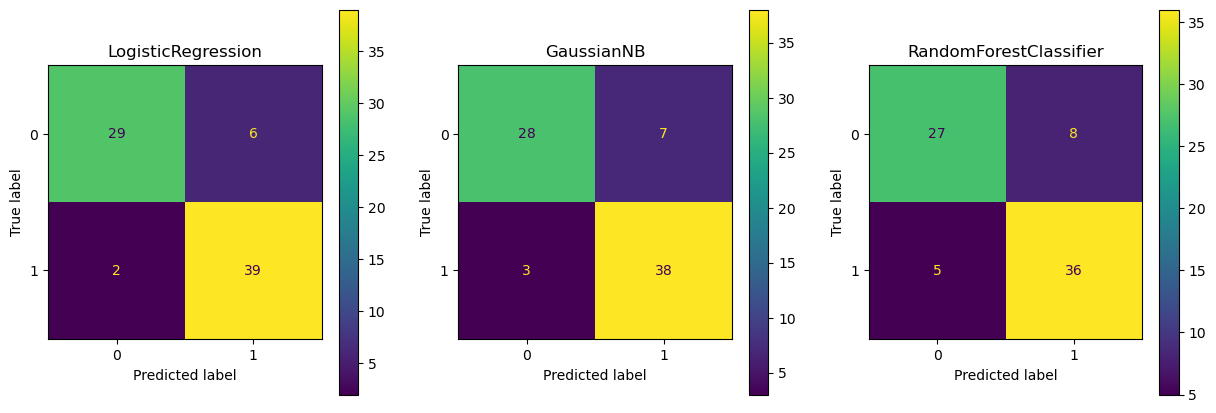

In [164]:
# confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

cm_log = confusion_matrix(y_test, y_pred_log, labels=log_clf.classes_)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=log_clf.classes_)
disp_log.plot(ax=axes[0])
axes[0].set_title("LogisticRegression")

cm_nb = confusion_matrix(y_test, y_pred_nb, labels=nb_clf.classes_)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_clf.classes_)
disp_nb.plot(ax=axes[1])
axes[1].set_title("GaussianNB")

cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_clf.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_clf.classes_)
disp_rf.plot(ax=axes[2])
axes[2].set_title("RandomForestClassifier")

In [161]:
# two other models
# graphical display of accuracy/precision/recall/f1
# ROC curve and AUC metrics
# confusion matrices